In [3]:
include("../necklaces.jl")
using BenchmarkTools, Plots, ProgressMeter, Distributions

In [8]:
p = 7
m = 4
n = p^m
reps = 3*p*m
n_samples = 5000
samples = zeros(Int, n_samples, reps)
@showprogress for i in 1:n_samples
    _, js = burnside_process(n, reps)
    samples[i, 1:reps] = js
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:08


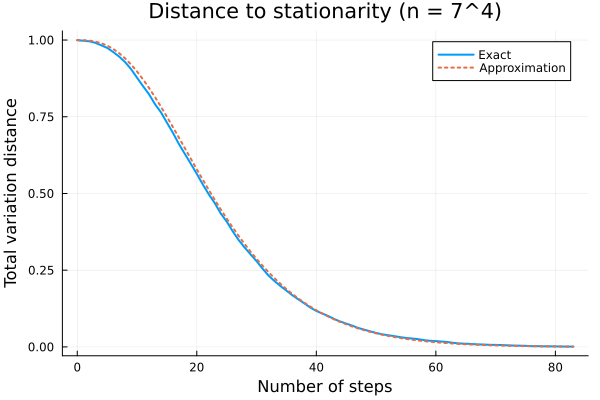

In [9]:
TV_dist = (1 .- sum(samples .== 0, dims = 1)/n_samples)'
ts = 0:(reps-1)
approx = ones(reps)
for t in 1:(reps-1) 
    nbin = NegativeBinomial(t, 1-1/p)
    approx[t+1] = cdf(nbin, m-1)
end
plt = plot(ts, TV_dist, label="Exact", linewidth = 2)
plot!(plt, ts, approx, label="Approximation",linewidth = 2, linestyle = :dot)
xlabel!(plt, "Number of steps")
ylabel!(plt, "Total variation distance")
title!(plt, "Distance to stationarity (n = 7^4)")
savefig(plt, "../Figures/necklaces_7_pow_4.pdf")
plt

In [13]:
n, 2^11

(2401, 2048)

In [26]:
p = 5
m = 5
n = p^m
reps = 3*p*m
n_samples = 5000
samples = zeros(Int, n_samples, reps)
@showprogress for i in 1:n_samples
    _, js = burnside_process(n, reps)
    samples[i, 1:reps] = js
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:12


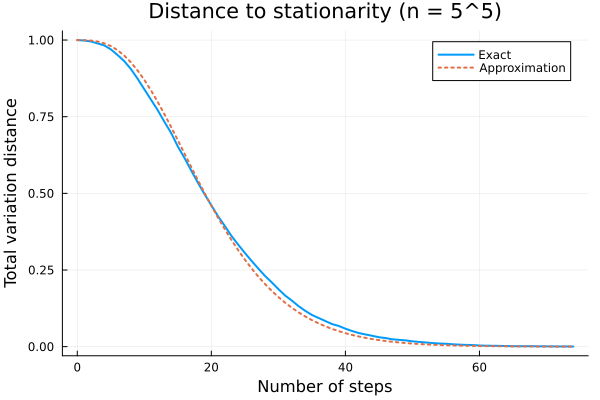

In [27]:
TV_dist = (1 .- sum(samples .== 0, dims = 1)/n_samples)'
ts = 0:(reps-1)
approx = ones(reps)
for t in 1:(reps-1) 
    nbin = NegativeBinomial(t, 1-1/p)
    approx[t+1] = cdf(nbin, m-1)
end
plt = plot(ts, TV_dist, label="Exact", linewidth = 2)
plot!(plt, ts, approx, label="Approximation",linewidth = 2, linestyle = :dot)
xlabel!(plt, "Number of steps")
ylabel!(plt, "Total variation distance")
title!(plt, "Distance to stationarity (n = 5^5)")
savefig(plt, "../Figures/necklaces_5_pow_5.pdf")
plt